In [55]:
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.losses import Loss
from cal_error import ExpectedCalibrationError
import time 
from matplotlib import pyplot as plt


In [58]:
train_raw = loadmat('/home/thlarsen/ood_detection/learn_uncertainty/datasets/svhndataset/train_32x32.mat')
test_raw = loadmat('/home/thlarsen/ood_detection/learn_uncertainty/datasets/svhndataset/test_32x32.mat')

N=200

x_train_raw = np.array(train_raw['X'])
x_test_raw = np.array(test_raw['X'])

x_train_raw = np.moveaxis(x_train_raw, -1, 0)
x_test_raw = np.moveaxis(x_test_raw, -1, 0)

y_train = train_raw['y']
y_test = test_raw['y']

print(x_test.shape)
print(y_test.shape)

def process_images(x): 
    x = np.dot(x, [0.299, 0.587, 0.114])
    print(x.shape)
#     for i in range(30, 40):
#         print(f'i={i}, y={y_test[i]}, mean={np.mean(x[i])}')
#         print(x[i])
#         plt.imshow(x[i])
#         plt.show()

    x = np.reshape(x, (-1, 32*32))
    return x.astype('float64')


# x_train = process_images(x_train)
x_test = process_images(x_test_raw)
# y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
print(y_test[35])

(200, 1024)
(200, 1)
(200, 32, 32)
[1]


i=0, y=[5]


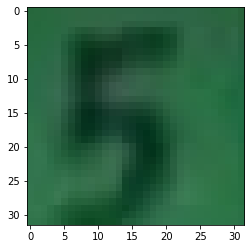

i=1, y=[2]


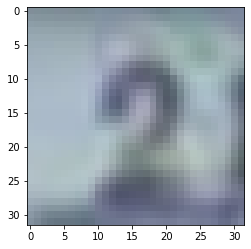

i=2, y=[1]


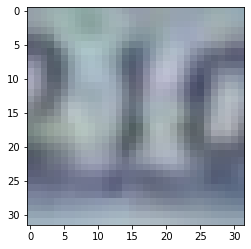

i=3, y=[10]


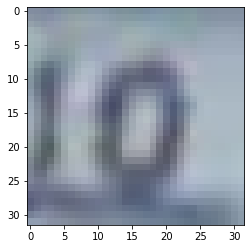

i=4, y=[6]


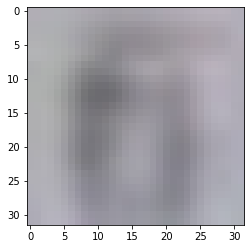

i=5, y=[1]


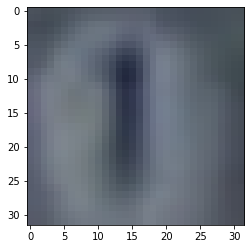

i=6, y=[9]


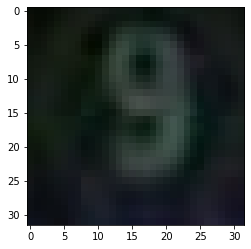

i=7, y=[1]


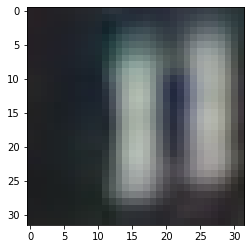

i=8, y=[1]


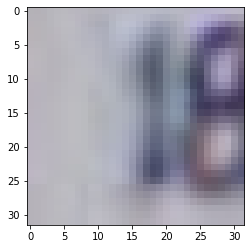

i=9, y=[8]


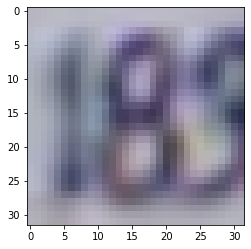

(10000, 32, 32)
(10000, 1024)


In [68]:
#MNIST CELL
input_dim = 32*32
(x_train_m, y_train_m), (x_test_m, y_test_m) = keras.datasets.mnist.load_data()

x_train_m = np.pad(x_train_m, ((0,0),(2,2),(2,2)), 'constant')
x_test_m = np.pad(x_test_m, ((0,0),(2,2),(2,2)), 'constant')

for i in range(0, 10):
        print(f'i={i}, y={y_test[i]}')
        plt.imshow(x_test_raw[i])
        plt.show()
print(x_test_m.shape)

x_train_m = np.reshape(x_train_m, (-1, input_dim))
x_test_m = np.reshape(x_test_m, (-1, input_dim))

print(x_test_m.shape)


In [60]:
lr = 10**-3 
w = 1
prefix = '/home/thlarsen/ood_detection/learn_uncertainty/'
model_save_path = f'{prefix}saved_weights/mnist_calibrate/cal(lr={lr})(w={w})'

model = keras.models.load_model(model_save_path)

In [61]:
y_pred_test = model.predict(x_test)
y_pred_test_m = model.predict(x_test_m)

print(y_pred_test_m.shape)


(10000, 10)


In [62]:
acc_fn = keras.metrics.SparseCategoricalAccuracy()
print(f"svhn acc = {acc_fn(y_test, y_pred_test)}")
print(f"mnist acc = {acc_fn(y_test_m, y_pred_test_m)}")
ece = ExpectedCalibrationError()
print(f"svhn ece = {ece.call(y_test, y_pred_test)}")
print(f"mnist ece = {ece.call(y_test_m, y_pred_test_m)}")

svhn acc = 0.09000000357627869
mnist acc = 0.9149019718170166
svhn ece = 0.006544063333421946
mnist ece = 0.0007914838497526944


In [63]:
# print(y_pred_test[30:40])
# print(np.argmax(y_pred_test, axis=1)[30:40])

In [66]:
A=10
B=30


def manual_obs_model(model, X_raw, X, Y): 
    correct = 0
    Y_hat = model.predict(X)
    for i in range(B - A): 
        print(f'y={Y[i]}, y_hat={np.argmax(Y_hat[i])}, probs={tf.nn.softmax(Y_hat[i])}')
        plt.imshow(X_raw[i])
        plt.show()
#     acc = tf.reduce_sum(Y_hat == Y) / X.shape[0] 
#     print('acc = {acc}')


(200, 1024)
y=[3], y_hat=4, probs=[1.5122123e-10 1.3539750e-10 5.6300803e-05 2.4875607e-07 7.2856784e-01
 3.2083441e-03 6.9171176e-05 7.9786622e-07 6.9341937e-08 2.6809722e-01]


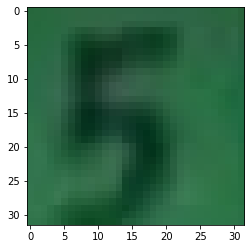

y=[6], y_hat=8, probs=[0.10370617 0.02669136 0.06709417 0.17337692 0.08082449 0.0404753
 0.08472154 0.03860816 0.22482236 0.15967947]


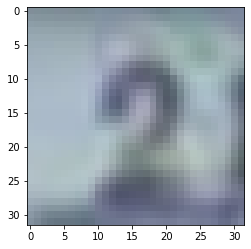

y=[5], y_hat=8, probs=[0.09394061 0.04783669 0.0680685  0.11911394 0.06191329 0.05053875
 0.06570218 0.04432135 0.30418777 0.14437687]


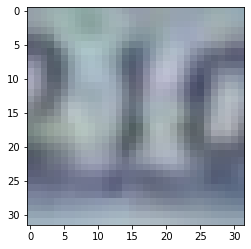

y=[1], y_hat=4, probs=[4.7191616e-24 4.0125977e-22 1.6055278e-17 3.7119327e-25 1.0000000e+00
 9.0068771e-19 2.1666423e-14 9.7154679e-16 1.6554577e-12 8.3482016e-10]


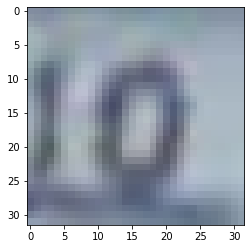

y=[4], y_hat=4, probs=[3.4066293e-30 6.3510961e-33 6.7466555e-21 1.4533702e-32 1.0000000e+00
 3.4892009e-21 7.7690059e-19 9.8912138e-19 1.7217120e-16 9.1031171e-10]


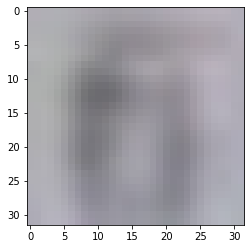

y=[4], y_hat=4, probs=[1.2970645e-33 1.5822471e-32 1.0833471e-22 1.9699974e-37 1.0000000e+00
 2.7180151e-28 2.0572704e-19 6.3040522e-18 8.3468989e-17 2.4004293e-13]


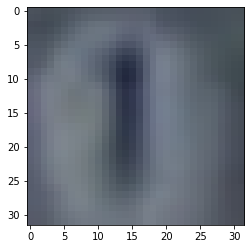

y=[1], y_hat=4, probs=[1.0528888e-28 1.9876433e-32 1.7530799e-16 1.9696992e-27 1.0000000e+00
 8.5884093e-15 2.5654747e-13 8.5776440e-21 1.4123842e-16 2.6062581e-09]


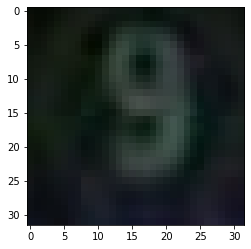

y=[6], y_hat=4, probs=[1.6243883e-10 4.0772965e-11 2.3423016e-05 9.2885210e-07 9.6216977e-01
 1.0721246e-04 7.1841328e-07 1.8934284e-07 3.2487799e-07 3.7697408e-02]


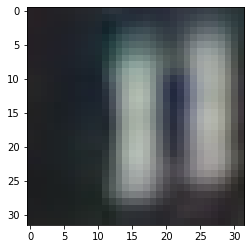

y=[3], y_hat=4, probs=[1.6140278e-15 2.0680448e-16 1.0644832e-09 1.9140094e-11 9.9974793e-01
 1.9602169e-08 2.1158342e-10 4.9967863e-11 2.8802002e-10 2.5211053e-04]


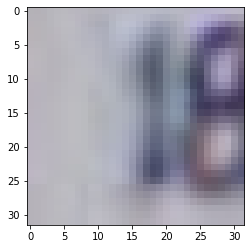

y=[4], y_hat=4, probs=[4.7791947e-19 4.6108881e-21 3.2206395e-09 3.1093538e-15 9.9990106e-01
 2.8705279e-06 1.9518534e-08 6.3868134e-14 6.0848361e-11 9.6109747e-05]


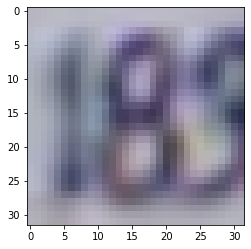

y=[2], y_hat=8, probs=[6.2547665e-04 5.4846681e-05 1.5788508e-05 5.0291859e-02 3.4847828e-06
 5.5547051e-02 2.8685563e-09 1.7036602e-06 8.2074356e-01 7.2716273e-02]


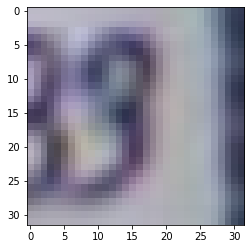

y=[10], y_hat=8, probs=[2.6135019e-04 1.2989402e-03 1.1517369e-03 4.2307511e-05 3.2701114e-01
 3.5293159e-04 6.4213858e-03 8.6271022e-05 6.5916133e-01 4.2126472e-03]


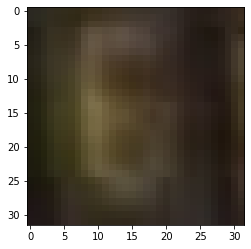

y=[1], y_hat=4, probs=[1.51295226e-10 1.80058954e-10 1.13018705e-05 1.28831601e-07
 7.93730974e-01 6.17923972e-04 3.90596579e-05 2.21628466e-06
 2.56429686e-08 2.05598265e-01]


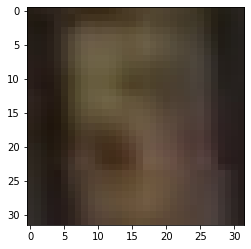

y=[3], y_hat=4, probs=[7.0517386e-20 2.6474970e-19 1.4830283e-11 8.2914289e-22 9.9999917e-01
 3.0774314e-11 1.0443059e-09 1.2472900e-15 8.2475810e-07 7.2455708e-10]


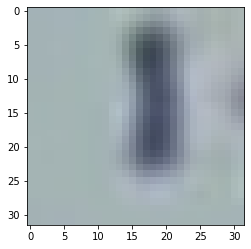

y=[2], y_hat=4, probs=[2.13169754e-15 2.54639476e-10 1.68767222e-08 3.89086967e-17
 8.98738563e-01 2.64794409e-09 6.73761360e-06 7.63423439e-12
 1.01254664e-01 8.11521250e-09]


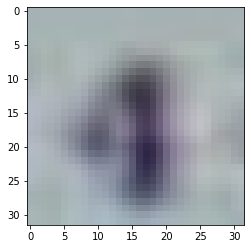

y=[5], y_hat=9, probs=[1.2447401e-07 1.5923386e-05 4.9898514e-05 6.7377426e-03 2.3430284e-06
 1.1529734e-01 1.0530700e-05 3.5842012e-03 3.5401838e-11 8.7430185e-01]


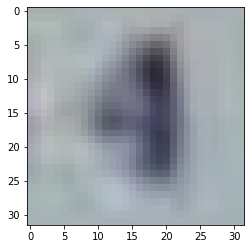

y=[4], y_hat=3, probs=[0.08113869 0.01702224 0.07678401 0.22214313 0.12706159 0.04272199
 0.09079215 0.03933456 0.14690255 0.15609899]


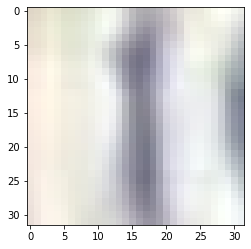

y=[1], y_hat=3, probs=[0.08214153 0.00523124 0.04070358 0.27005515 0.066101   0.01379347
 0.07049348 0.01327132 0.2555463  0.1826629 ]


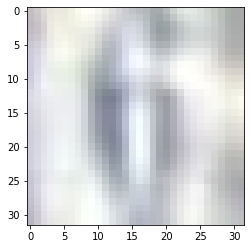

y=[4], y_hat=3, probs=[0.04210749 0.00280913 0.05490657 0.3461555  0.14730288 0.01913479
 0.05862631 0.01604182 0.12847131 0.18444419]


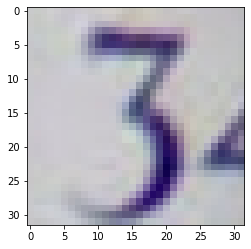

y=[2], y_hat=9, probs=[1.0839239e-04 1.4348666e-04 4.8643965e-02 9.9989846e-02 1.3003714e-01
 5.7771675e-02 9.5788919e-04 8.0651781e-03 5.1056978e-04 6.5377182e-01]


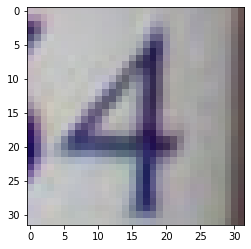

In [69]:
print(x_test.shape)
manual_obs_model(model, x_test_raw, x_test[A:B], y_test[A:B])